# Comparison TPV tracks and MCS observations 

In [1]:
import re
import numpy as np
import pandas as pd
from tpv_analysis import get_tracks, check_overlap, check_overlap_tcs
import warnings
warnings.filterwarnings('ignore')

## Get TPV tracks 

In [6]:
filename='tpv_files_JuliaK/tpv_2015.real_time'
tpv = get_tracks(filename, 2015)


## Get MCS tracks 

In [8]:
# read in CTT tracks heavy rain core 
tbb = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tcs/Tracks_2015_heavyraincore3mm.h5'
mcs= pd.read_hdf(tbb, 'table')
mcs.timestr = pd.to_datetime(mcs.timestr) 

In [9]:
mcs_count, mcs_count_off, tpv_no_mcs, mcs_no_tpv, all_mcs, all_tpv = check_overlap_tcs(tpv,mcs)

## Overlap check for 15 years of TCS and TPV  

In [2]:
total_mcs= np.zeros((15,))
total_tpv= np.zeros((15,))
total_overlap= np.zeros((15,))
total_overlap_off= np.zeros((15,))
total_mcsoverlap= np.zeros((15,))
total_mcsoverlap_off= np.zeros((15,))
cellcount_mcs = np.zeros((15,))
cellcount_tpv = np.zeros((15,))
mcs_check= 0 

for y in np.arange(2001,2016):
    # tpv data 
    filename='tpv_files_JuliaK/tpv_' + str(y)+'.real_time'
    tpv = get_tracks(filename, y)
    
    # mcs data 
    tbb = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tcs/Tracks_'+ str(y)+ '_heavyraincore3mm.h5'
    mcs= pd.read_hdf(tbb, 'table')
    mcs.timestr = pd.to_datetime(mcs.timestr) 
    
    # overlap check 
    i = y - 2001
    mcs_count, mcs_count_off, tpv_no_mcs, mcs_no_tpv, all_mcs, all_tpv, overlap_mcs, overlap_mcs_off = check_overlap_tcs(tpv,mcs)
    total_overlap[i] = np.shape(mcs_count[mcs_count > 0])[0]
    total_overlap_off[i] =  np.shape(mcs_count_off[mcs_count_off > 0])[0] 
    
    total_mcsoverlap[i] = overlap_mcs
    total_mcsoverlap_off[i] =  overlap_mcs_off
    
    total_tpv[i] =  tpv_no_mcs
    total_mcs[i] =  mcs_no_tpv
    
    # for check 
    cellcount_mcs[i] = all_mcs 
    cellcount_tpv[i] = all_tpv

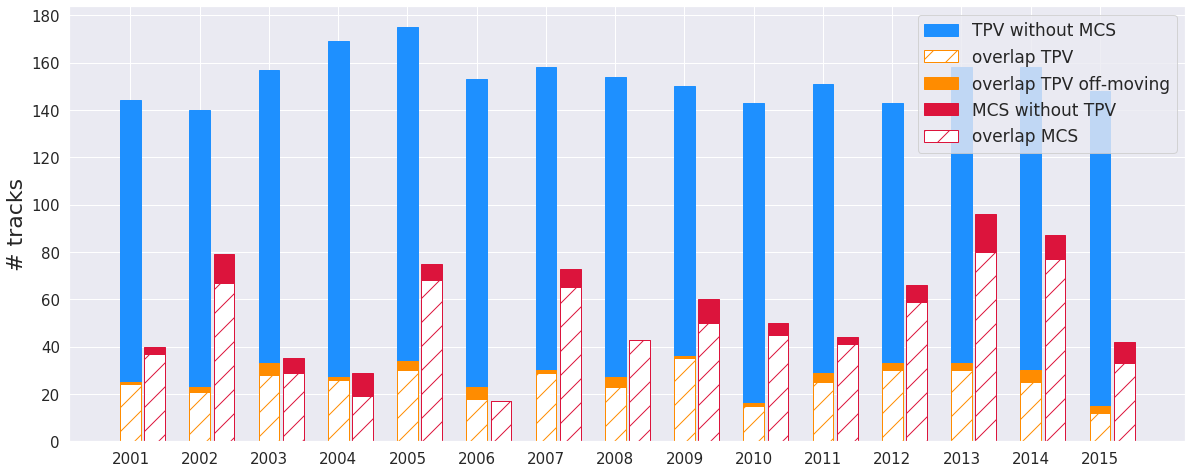

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
plt.figure(figsize= (20,8))
years = np.arange(2001,2016)
w = 0.3
# TPV 
plt.bar(years, cellcount_tpv, edgecolor = 'dodgerblue', color = 'dodgerblue', label= 'TPV without MCS', width =w)
plt.bar(years,  total_overlap, edgecolor = 'darkorange', color = 'white', hatch = '/', label = 'overlap TPV', width =w)
plt.bar(years,  total_overlap_off, bottom = total_overlap, edgecolor ='darkorange' ,color = 'darkorange',label = 'overlap TPV off-moving', width =w)


# MCS 
plt.bar(years + 0.35, cellcount_mcs,edgecolor = 'crimson', color = 'crimson', label = 'MCS without TPV', width =w)
plt.bar(years+ 0.35, cellcount_mcs - total_mcs , edgecolor = 'crimson', color ='white',  hatch = '/', label = 'overlap MCS', width =w)

plt.xticks(years, fontsize= 15)
plt.yticks(np.arange(0,200,10)[::2], fontsize= 15)
plt.legend(fontsize= 17)

plt.ylabel('# tracks', fontsize= 22)
plt.savefig('TCS_and_TPV.png')
plt.show()

- many occurrences of TPV without any MCS over the TP 
- little MCS without the occurrence of TPV (mostly non-off moving)

- check relationship between overlaps (do stronger TPV lead to stronger MCS? )
- check what are the TPV that have multiple MCS associated with it 

- TPV (moving off) and TPB east 
- TPV and MCS initiated in Sichuan basin (lat > 25N, lon< 110 E )